# Plotting slices and volume rendering with yt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nugridpy.utils as utils
from ppmpy import ppm
import os
import yt

dir_repo = '/data/ASDR'
dir_project = 'H-core-M25'
run = 'M35-1536'
dump = 425

path = os.path.join(dir_repo,dir_project,run)
moms = ppm.MomsDataSet(os.path.join(path,'myavsbq'),dump)

249 .aaa files found in '/data/ASDR/H-core-M25/M35-1536/myavsbq/.
Dump numbers range from 3 to 437.
The PPMstar grid is being constructed, this can take a moment


In [2]:
x,y,z,r = moms.get_grid()

res = moms.momsdata.resolution    # should be 384
vor_matrix = np.reshape(moms.get(6,dump),(res,res,res))

yt : [INFO     ] 2018-12-01 11:49:18,153 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-12-01 11:49:18,153 Parameters: domain_dimensions         = [384 384 384]
yt : [INFO     ] 2018-12-01 11:49:18,154 Parameters: domain_left_edge          = [-2493.48950195 -2493.48950195 -2493.48950195]
yt : [INFO     ] 2018-12-01 11:49:18,156 Parameters: domain_right_edge         = [2493.48950195 2493.48950195 2493.48950195]
yt : [INFO     ] 2018-12-01 11:49:18,157 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2018-12-01 11:49:18,639 xlim = -2500.031250 2500.031250
yt : [INFO     ] 2018-12-01 11:49:18,640 ylim = -2500.031250 2500.031250
yt : [INFO     ] 2018-12-01 11:49:18,641 xlim = -2500.031250 2500.031250
yt : [INFO     ] 2018-12-01 11:49:18,642 ylim = -2500.031250 2500.031250
yt : [INFO     ] 2018-12-01 11:49:18,644 Making a fixed resolution buffer of (('stream', 'vorticity')) 800 by 800
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator 


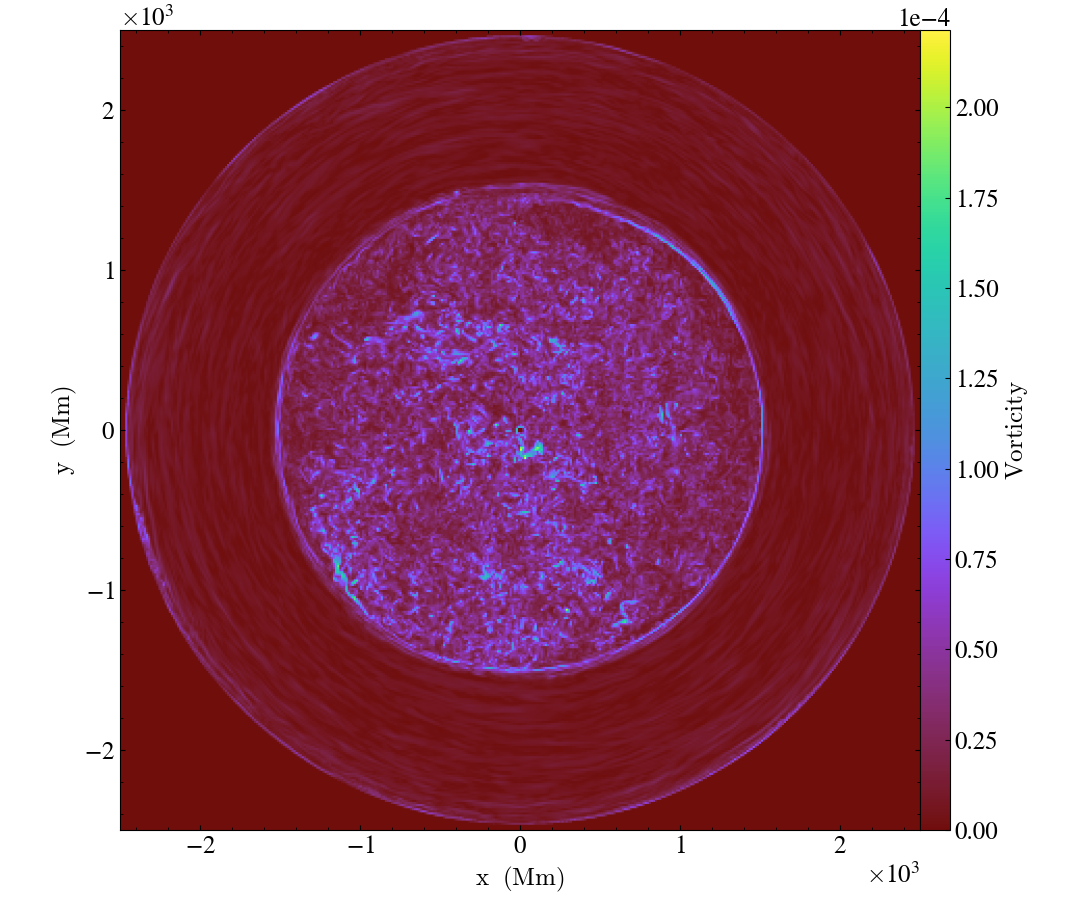

In [3]:
data = dict(vorticity=vor_matrix)
bbox = np.array([[min(x),max(x)], [min(y),max(y)], [min(z),max(z)]])
ds = yt.load_uniform_grid(data=data, domain_dimensions=[res,res,res], length_unit='Mm', bbox=bbox)

slc = yt.SlicePlot(ds, normal='z', fields='vorticity', center='c', width=(np.diff(x)[0]*res, 'Mm'))
slc.set_log('vorticity', False)

In [4]:
sc = yt.create_scene(ds, 'vorticity')
source = sc[0]
source.set_log(False)

<Volume Source>:YTRegion (UniformGridData): , center=[0. 0. 0.] cm, left_edge=[-2.4934895e+11 -2.4934895e+11 -2.4934895e+11] cm, right_edge=[2.4934895e+11 2.4934895e+11 2.4934895e+11] cm transfer_function:None

DEBUG:matplotlib.axes._base:update_title_pos


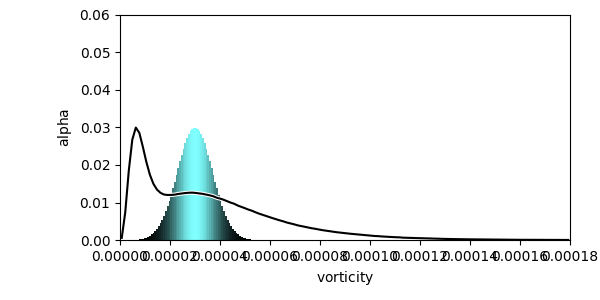

In [5]:
bounds = (0,1.8e-4)
tf = yt.ColorTransferFunction(x_bounds=bounds)
tf.add_gaussian(location=3.e-5, width=1.e-10, height=[0.5,1,1,0.03])   # [r,g,b,alpha]

# apply our transfer function to the source
source.tfh.tf = tf    # tfh is TransferFunctionHelper
source.tfh.bounds = bounds
source.tfh.plot(profile_field='vorticity')

yt : [INFO     ] 2018-12-01 11:50:13,033 Rendering scene (Can take a while).
yt : [INFO     ] 2018-12-01 11:50:13,038 Creating volume


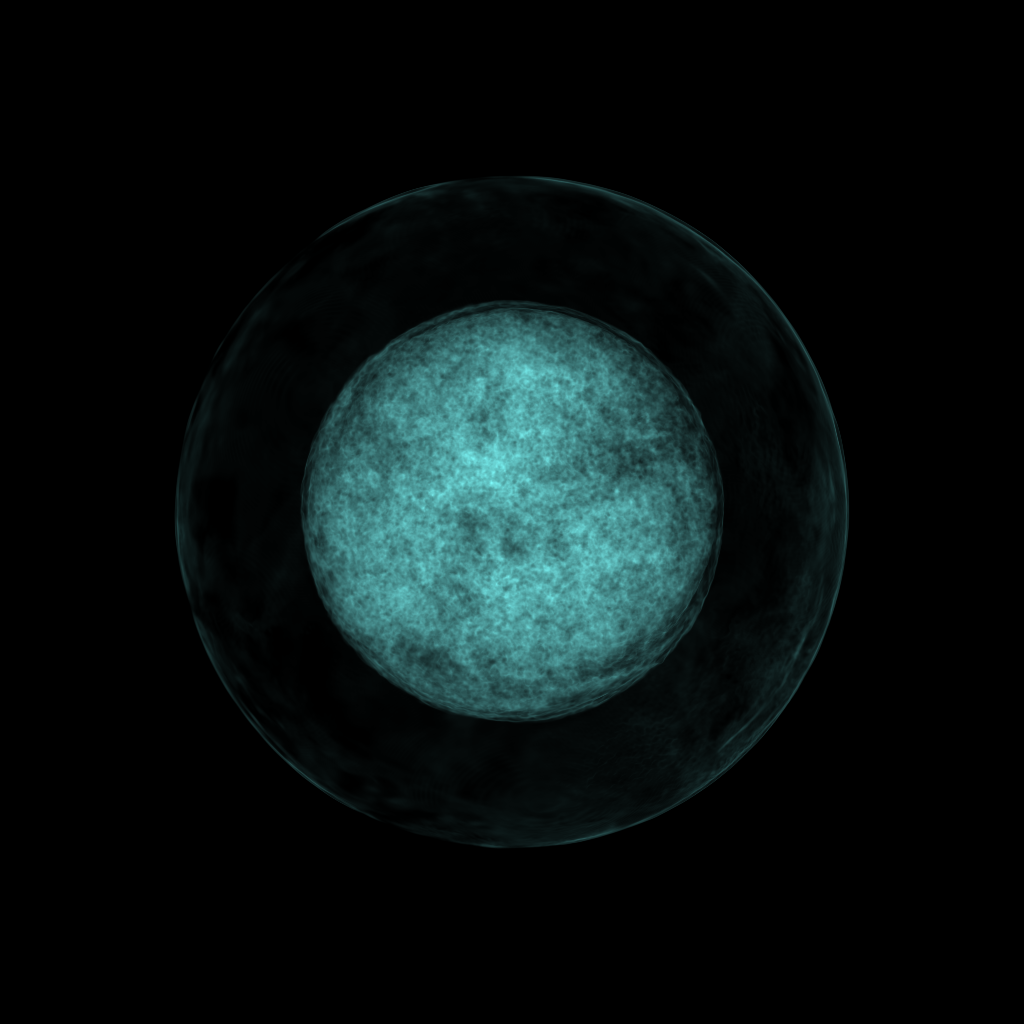

In [6]:
sc.camera.resolution = (1024,1024)
sc.camera.position=[1,1,1.5]
sc.show(sigma_clip=4.0)

yt : [INFO     ] 2018-12-01 11:54:42,155 Rendering scene (Can take a while).
yt : [INFO     ] 2018-12-01 11:54:42,158 Creating volume
yt : [INFO     ] 2018-12-01 11:54:45,462 Creating transfer function
yt : [INFO     ] 2018-12-01 11:54:45,463 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


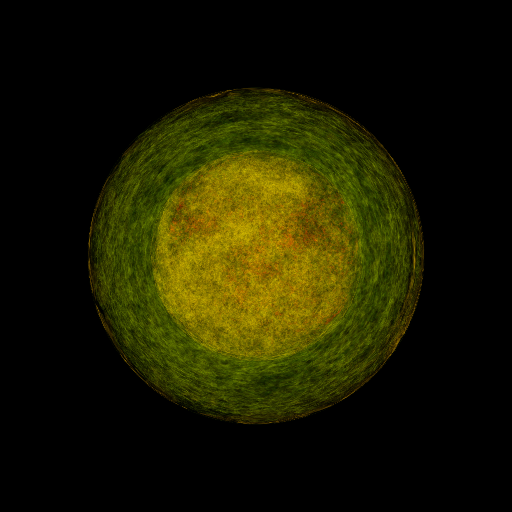

In [9]:
sc2 = yt.create_scene(ds, 'vorticity')
sc2.show(sigma_clip=4.0)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.ticker:vmin 3.4883105293204083e-09 vmax 0.0003656207991298287
DEBUG:matplotlib.ticker:ticklocs array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02])
DEBUG:matplotlib.ticker:vmin 3.4883105293204083e-09 vmax 0.0003656207991298287
DEBUG:matplotlib.ticker:ticklocs [2e-10, 3e-10, 4e-10, 5e-10, 6e-10, 7.000000000000001e-10, 8e-10, 9e-10, 2e-09, 3.0000000000000004e-09, 4e-09, 5e-09, 6.000000000000001e-09, 7.000000000000001e-09, 8e-09, 9.000000000000001e-09, 2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 2e-07, 3e-07, 4e-07, 5e-07, 6e-07, 7e-07, 8e-07, 9e-07, 2e-06, 3e-06, 4e-06, 4.9999999999999996e-06, 6e-06, 7e-06, 8e-06, 9e-06, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007, 0.0008, 0.0009000000000000001, 0.002, 0.003, 0.0

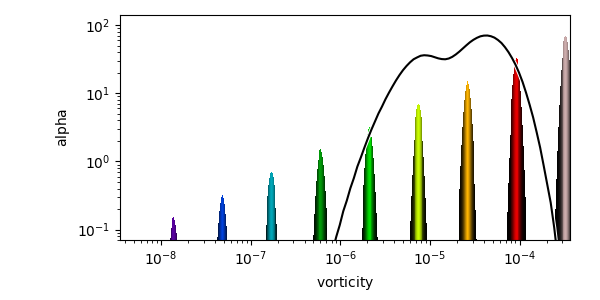

In [8]:
sc2[0].tfh.plot(profile_field='vorticity')